---
title: Least Squares Optimization
---

In [1]:
%matplotlib inline
import numpy
import numpy.random
import matplotlib.pyplot as plt
import numpy.linalg



Define your x variable

In [2]:
x = numpy.r_[-10:10:.5]
x

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])

Define y as a function of x.  This can be anything

In [3]:
y = 3*x
#y = x**2
y = 2*x**3
y += 2*numpy.sin(x)
y /= y.max()
y

array([-1.16581845e+00, -1.00000000e+00, -8.50824970e-01, -7.17279360e-01,
       -5.98377987e-01, -4.93191502e-01, -4.00859731e-01, -3.20588089e-01,
       -2.51627928e-01, -1.93245642e-01, -1.44688088e-01, -1.05152789e-01,
       -7.37702189e-02, -4.96025012e-02, -3.16588415e-02, -1.89239181e-02,
       -1.03922769e-02, -5.10030999e-03, -2.14798940e-03, -7.05033996e-04,
        0.00000000e+00,  7.05033996e-04,  2.14798940e-03,  5.10030999e-03,
        1.03922769e-02,  1.89239181e-02,  3.16588415e-02,  4.96025012e-02,
        7.37702189e-02,  1.05152789e-01,  1.44688088e-01,  1.93245642e-01,
        2.51627928e-01,  3.20588089e-01,  4.00859731e-01,  4.93191502e-01,
        5.98377987e-01,  7.17279360e-01,  8.50824970e-01,  1.00000000e+00])

Now create an array of normally distributed noise

In [4]:
rand = numpy.random.randn(*y.shape)/10
y_rand = y+rand
y_rand

array([-1.03966184, -1.11103693, -0.89738405, -0.7897717 , -0.61606444,
       -0.58075587, -0.32366094, -0.41986849, -0.2252123 , -0.27872011,
       -0.06530092, -0.05975687, -0.0774088 , -0.1278407 ,  0.08502485,
       -0.06129926, -0.12204749,  0.14838957,  0.02424667,  0.00377575,
        0.11386753,  0.00182104,  0.01021305, -0.00858236,  0.14212112,
        0.18574359,  0.03174494, -0.01499514,  0.12695571,  0.08401802,
        0.21914263,  0.24385571,  0.1560743 ,  0.38365295,  0.59747615,
        0.46985472,  0.55933946,  0.61241949,  0.9059338 ,  0.79946197])

Plot y against the random vector

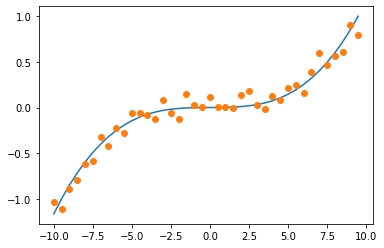

In [5]:
plt.plot(x,y)
plt.plot(x,y_rand,'o')

Now assume you create a model of the form $y(k)^*$ where k are your model coefficients.  You want to pick your model in such a way that the error from $y-y^*$ is minimized.  The residual error, or just residual can be expressed as 

$$r=y-y^*$$

thus the sum of squared error is 

$$||r||^2 = ||y-y^*||^2 = y^T y - 2*y^Ty^* + {y^*}^T y^*$$

Now in matrix form, $y^*$ takes the form $y^*=Ak$, where $k$ is your set of model weights in the form

$$k=\left[\begin{matrix}k_1&k_2&\ldots &k_m\end{matrix}\right]^T,$$

and $A$ is your set of models applied to the input variable $x$
$$A = A(x) = \left[\begin{matrix}
a_1(x_0) & a_2(x_0)& \ldots& a_m(x_0)\\
a_1(x_1) & a_2(x_1)& \ldots &a_m(x_1)\\
\vdots & \vdots & \ddots& \vdots\\
a_1(x_n) & a_2(x_n)& \ldots& a_m(x_n)\\
\end{matrix}
\right]$$

### Example

In our case we will try to model our data with $A(x) = \left[\begin{matrix}x&x^2&x^3&\sin(x)\end{matrix}\right]$

In [6]:
A = numpy.array([x,x**2,x**3,x**4,x**5,x**6]).T
A.shape

(40, 6)

With the model stated, we may now expand the sum of squared error with our model:

$$||r||^2 = y^T y - 2y^T(Ak) + k^TA^TAk$$

But when optimizing, you are not optimizing for $x$ or even $A(x)$, which is either given or selected by you, but for the $k$ weighting parameters, which you may select in order to minimize the above equation.  Thus the error will be minimized at the point where $$\frac{d(||r||^2)}{dk}=0,$$ or 

$$ - 2y^T A+ 2k^T A^T A=0$$

Solving for k,
$$ k^T A^T A= y^T A$$
$$ (k^T A^T A)^T= (y^T A)^T$$
$$ (A^T A)^Tk=  A^Ty$$
$$ (A^T A)k=  A^Ty$$
$$ (A^T A)^{-1}(A^T A)k=  (A^T A)^{-1}A^Ty$$

The optimimum value for k is thus

$$ k=  (A^T A)^{-1}A^Ty$$

### Example

In [7]:
B = numpy.linalg.inv(A.T.dot(A))
coeff = B.dot(A.T.dot(y_rand))
coeff

array([-2.18923289e-03,  2.77108020e-03,  1.55743851e-03, -8.14782525e-05,
       -4.86516898e-06,  4.69654727e-07])

Plotting the coefficients, we see that the weights for $x^3$ are near 1 while all other weights are quite small.

[Text(0, 0, '$x$'),
 Text(1, 0, '$x^2$'),
 Text(2, 0, '$x^3$'),
 Text(3, 0, '$x^4$'),
 Text(4, 0, '$x^5$'),
 Text(5, 0, '$x^6$')]

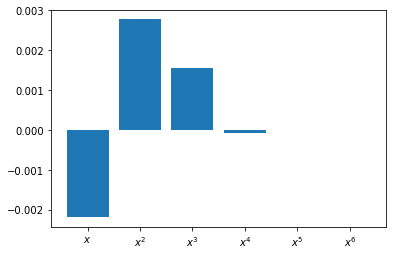

In [8]:
xx = numpy.r_[:6]
labels = '$x$','$x^2$','$x^3$','$x^4$','$x^5$','$x^6$'
f = plt.figure()
ax = f.add_subplot()
ax.bar(xx,coeff)
ax.set_xticks(xx)
ax.set_xticklabels(labels)

To return $y^*$, 

In [9]:
y_model = A.dot(coeff)

Plotting the noisy data against the model, we get

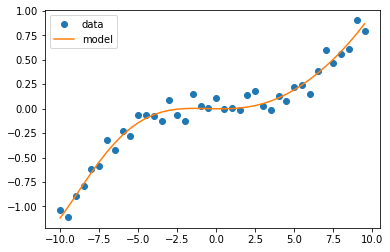

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

a = ax.plot(x,y_rand,'o')
b = ax.plot(x,y_model)

ax.legend(a+b,['data','model'])

And finally, to plot the residual

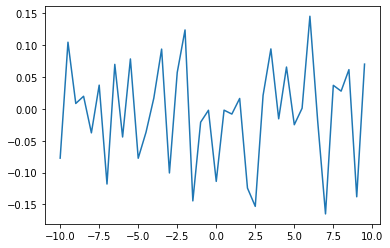

In [11]:
plt.figure()
plt.plot(x,y_model-y_rand)

Now try other models, higher resolution data, and different domains